# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [182]:
! pip install panel

In [183]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from panel.interact import interact
from panel import widgets
import matplotlib.pyplot as plt

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [184]:
# Read the Mapbox API key
# Run . keys.sh file that contains MAPBOX_API_KEY = "..."
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [185]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(
    file_path, 
    infer_datetime_format=True,
    parse_dates=True,
    index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [186]:
# See structures and types of the data sets
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010-01-01,Alamo Square,291.182945,372560,1239
2010-01-01,Anza Vista,267.932583,372560,1239
2010-01-01,Bayview,170.098665,372560,1239
2010-01-01,Buena Vista Park,347.394919,372560,1239
2010-01-01,Central Richmond,319.027623,372560,1239


In [187]:
sfo_data.dtypes

neighborhood            object
sale_price_sqr_foot    float64
housing_units            int64
gross_rent               int64
dtype: object

In [188]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [189]:
df_neighborhood_locations.dtypes

Neighborhood     object
Lat             float64
Lon             float64
dtype: object

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [190]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # Slice for housing units per year    
    housing_units_grp = (
        sfo_data[["housing_units"]] 
        .groupby([sfo_data.index])
        ).mean()
    housing_units_grp.reset_index(inplace=True)          
    
    # Use rot and yformatter attributes/options
    plot_housing_units_grp = housing_units_grp.hvplot.bar(
        label="Figure 1a. Housing Units Per Year",
        x="year", y="housing_units", rot=45 
        ).opts(yformatter="%.0f",
        line_color="red",
        hover_line_color="green",
        bgcolor="lightgrey"
        )
    
    return plot_housing_units_grp

In [191]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
def housing_units_scaled_per_year():

    housing_units_filtered = sfo_data.filter(['year','housing_units']).groupby([sfo_data.index]).mean()

    padding = housing_units_filtered['housing_units'].std()
    mean = housing_units_filtered.mean()['housing_units']

    # plot bar chart based on 95.45% of the population being covered within +/- two standard deviations from the mean
    plot_housing_units_grp_scaled = housing_units_filtered.plot.bar(
        ylim=(mean-2*padding, mean+2*padding), 
        title="Figure 1b. Housing Units Per Year in San Francisco",
        figsize=(12,7))

    return plot_housing_units_grp_scaled

In [238]:
def average_gross_rent_bar():
    """Average Gross Rent in San Francisco Per Year."""
     
    # Slice for gross rent per year    
    gross_rent_grp = (
        sfo_data[["gross_rent"]] 
        .groupby([sfo_data.index])
        ).mean()
    gross_rent_grp.reset_index(inplace=True)          
    
    # Use plotly express for a bar chart
    padding_rent = 200
    min = gross_rent_grp.min()["gross_rent"] - padding_rent
    max = gross_rent_grp.max()["gross_rent"] + padding_rent
    
    plot_gross_rent_bar = px.bar(
        gross_rent_grp, x="year", y="gross_rent", title="Figure 2a. Average Gross Rent in San Francisco Per Year - A Bar Chart",
        range_y = [min, max],
        labels={"year": "Year", "gross_rent": "Gross Rent ($)"}
    )
    
    return plot_gross_rent_bar

In [239]:
def average_gross_rent_line():
       
    # Slice for gross rent per year    
    gross_rent_grp = (
        sfo_data[["gross_rent"]] 
        .groupby([sfo_data.index])
        ).mean()
    gross_rent_grp.reset_index(inplace=True)   

    
    # Use plotly express for a line chart
    padding_rent = 200
    min = gross_rent_grp.min()["gross_rent"] - padding_rent
    max = gross_rent_grp.max()["gross_rent"] + padding_rent
    
    plot_gross_rent_line = px.line(
        gross_rent_grp, x="year", y="gross_rent", 
        title='Figure 2b. Average Gross Rent in San Francisco Per Year - A Line Plot',
        range_y = [min, max],
        labels={"year": "Year", "gross_rent": "Gross Rent ($)"},
    )

    return plot_gross_rent_line

In [240]:
def average_sales_price_bar():
    """Average Sales Price Per Year."""
    
    # Slice for gross rent per year    
    sales_price_grp = (
        sfo_data[["sale_price_sqr_foot"]] 
        .groupby([sfo_data.index])
        ).mean()
    sales_price_grp.reset_index(inplace=True)          
    
    # Use plotly express for a bar chart
    padding_sales = 50
    min = sales_price_grp.min()["sale_price_sqr_foot"] - padding_sales
    max = sales_price_grp.max()["sale_price_sqr_foot"] + padding_sales
    
    plot_sales_price_bar = px.bar(
        sales_price_grp, x="year", y="sale_price_sqr_foot", title="Figure 3a. Average Sales Price in San Francisco Per Year - A Bar Graph",
        range_y = [min, max],
        labels={"year": "Year", "sale_price_sqr_foot": "Sales Price per Square Foot ($)"}
    )
    
    return plot_sales_price_bar

In [241]:
def average_sales_price_line():
    """Average Sales Price Per Year."""
     # Slice for gross rent per year    
    sales_price_grp = (
        sfo_data[["sale_price_sqr_foot"]] 
        .groupby([sfo_data.index])
        ).mean()
    sales_price_grp.reset_index(inplace=True)     
    
    # Use plotly express for a line chart
    padding_sales = 50
    min = sales_price_grp.min()["sale_price_sqr_foot"] - padding_sales
    max = sales_price_grp.max()["sale_price_sqr_foot"] + padding_sales
    
    plot_sales_price_line = px.line(
        sales_price_grp, x="year", y="sale_price_sqr_foot", 
        title='Figure 3b. Average Sales Price in San Francisco Per Year - A Line Plot',
        range_y = [min, max],
        labels={"year": "Year", "sale_price_sqr_foot": "Sales Price per Square Foot ($)"}
    )

    return plot_sales_price_line

In [274]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    # Slice for sale price per squre foot by year and neighborhood 
    sales_price_neighborhood_grp = (
        sfo_data[["sale_price_sqr_foot","neighborhood"]] 
        .groupby([sfo_data.index,sfo_data["neighborhood"]])
        ).mean()
    sales_price_neighborhood_grp.reset_index(inplace=True)   
   
    # Use hvplot to create an interactive line chart of the average price per sq ft.
    # The plot should have a dropdown selector for the neighborhood
    plot_sales_neighborhood_grp = sales_price_neighborhood_grp.hvplot.line(
        label="Figure 4. Annual Housing Sales Price Per Squre Foot in San Francisco Neighborhoods",
        x="year", y="sale_price_sqr_foot", rot=45,
        groupby='neighborhood',
        ).opts(yformatter="%.0f",
        line_color="black",
        hover_line_color="green",
        bgcolor="lightyellow")
    
    return plot_sales_neighborhood_grp 

In [275]:
# Visualize the mean `sales_price_sqr_foot` per year with the neighborhood as a dropdown selector.
# built in by "groupby="neighborhood" in the plot, plot_sales_neighborhood_grp above.
# interact(average_price_by_neighborhood, sfo_data['neighborhood'])

In [276]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # Slice for housing units per year    
    top_10_expensive = (
        sfo_data[["neighborhood","sale_price_sqr_foot"]] 
        .groupby(sfo_data["neighborhood"])
        ).mean()

    top_10_expensive.reset_index(inplace=True)
    top_10_expensive.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)

    top_10 = top_10_expensive.head(10)
    
    # Plotting the data from the top 10 expensive neighborhoods
    # Use rot and yformatter attributes/options
    plot_top_10_bar = top_10.hvplot.bar(
        label="Figure 5. Top 10 Most Expensive Neighborhood in San Francisco - A Bar Chart",
        x="neighborhood", y="sale_price_sqr_foot", rot=45
        ).opts(yformatter="%.0f",
        line_color="black",
        hover_line_color="red",
        bgcolor="lightblue"
        )
    
    return plot_top_10_bar

In [277]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    # Parallel Coordinates Plot on the top 10 most profitable neighborhood to invest
    # Data preparation
    average = (sfo_data).groupby([sfo_data["neighborhood"]]).mean()
    average.reset_index(inplace=True)
    average.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)
    mean = average.head(10)
    
    # Parallel Coordinates Plot
    plot_parallel_coordinates = px.parallel_coordinates(
        mean,
        dimensions=['sale_price_sqr_foot','housing_units', 'gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Figure 6a. Parallel Coordinates on Top 10 Most Profitable Neighborhoods for Housing Investment',
        labels={
            #"neighborhood": "Neighborhood", not showing up because it is not a numerical coordinate
            "sale_price_sqr_foot": "Sales Price Per Square Foot ($)",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent ($)"
            }
        )
    
    return plot_parallel_coordinates

In [278]:
def parallel_categories():
    """Parallel Categories Plot."""
    # Parallel Coordinates Plot on the top 10 most profitable neighborhood to invest
    # Data preparation
    average = (sfo_data).groupby([sfo_data["neighborhood"]]).mean()
    average.reset_index(inplace=True)
    average.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)
    mean = average.head(10)
    
    # Parallel Categories Plot
    plot_parallel_categories = px.parallel_categories(
        mean.round(3),
        dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno, 
        title='Figure 6b. Parallel Categories on Top 10 Most Profitable Neighborhoods for Housing Investment',
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sales Price Per Square Foot ($)",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent ($)"
            }
        )
    
    return plot_parallel_categories

In [279]:
def neighborhood_map():
    """Neighborhood Map"""
    
    # Load neighborhoods coordinates data
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_locations = pd.read_csv(file_path)
    
    # Calculate the mean values for each neighborhood
    avg = (sfo_data).groupby([sfo_data["neighborhood"]]).mean()
    avg.reset_index(inplace=True)
    
    # Join the average values with the neighborhood locations
    avg_neighborhood = pd.concat([df_neighborhood_locations,avg], axis=1, join="inner")

    # Mapbox visulization
    px.set_mapbox_access_token(mapbox_token)

    geo_map = px.scatter_mapbox(
        avg_neighborhood,
        text="neighborhood",
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire, 
        zoom=10,
        title='Figure 7. Map Box Geographical Scattered Plot on San Francisco Neighborhoods'
    )
    return geo_map

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column
    [0] Markdown(str)
    [1] HoloViews(Bars)
    [2] Str(AxesSubplot)

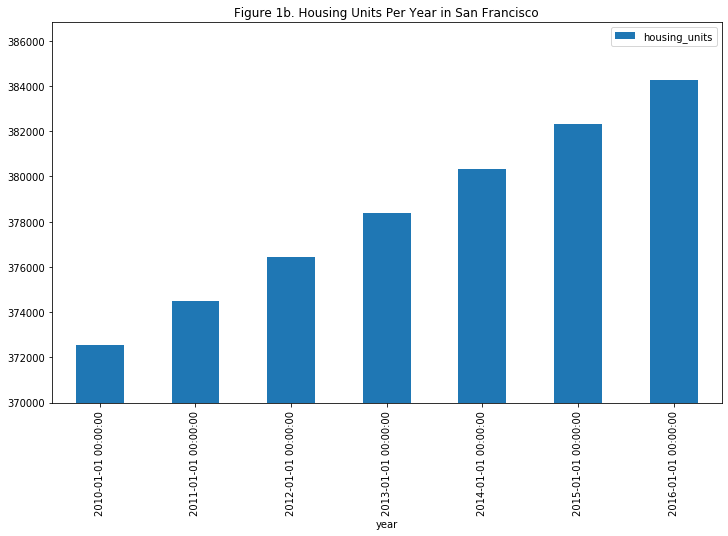

In [280]:
units_col = pn.Column(
    "## How Many Housing Units Are There? \n"
    "###_*Fluctuations Over Year in San Francisco*_",
    housing_units_per_year(),
    housing_units_scaled_per_year(),
)
units_col

In [281]:
yearly_col = pn.Column(
    "## Think Or Swim in San Francisco \n"
    "###_*Is It A Good Deal?*_",
    average_gross_rent_bar(),
    average_sales_price_bar()
)
yearly_col

Column
    [0] Markdown(str)
    [1] Plotly(Figure)
    [2] Plotly(Figure)

In [282]:
flow_col = pn.Column(
    "## See Trends in San Francisco Housing",
    "###_*Enjoy or Lease?*_",
    average_gross_rent_line(),
    average_sales_price_line()
)
flow_col

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Plotly(Figure)
    [3] Plotly(Figure)

In [290]:
annual_row = pn.Row(
    yearly_col, flow_col
)
annual_row

Row
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)

In [304]:
neighborhood_col = pn.Column(
    "## Nailed It! Zooming in San Francisco Neighborhoods",
    "_*Most Luxurious Neighborhoods by Average Sales Price per Square Foot*_",
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods()
)
neighborhood_col

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [3] HoloViews(Bars)

In [306]:
analysis_col = pn.Column(
    "## Home. Sweet home!",
    "###_*Where are we heading?*_",
    parallel_coordinates(),
    parallel_categories(),
    neighborhood_map()
)
analysis_col

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Plotly(Figure)
    [3] Plotly(Figure)
    [4] Plotly(Figure)

In [307]:
# Create tabs
panel = pn.Tabs(
    ("Supply", units_col),
    ("Annually", annual_row),
    ("Neighborhood", neighborhood_col),
    ("Analysis", analysis_col)
)
panel

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Str(AxesSubplot)
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
        [1] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [3] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
        [4] Plotly(Figure)

## Serve the Panel Dashboard

In [297]:
# . run.sh on command for with one line "panel serve dashboard.ipynb" in file
# Bokeh Application running on http://localhost:5006/dashboard

In [308]:
panel.servable()

Tabs(active=3)
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Str(AxesSubplot)
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
        [1] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [3] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
        [4] Plotly(Figure)

# References:
* CU GitLab Repository
* https://github.com/willwillis/python-pyviz-homework/blob/master/dashboard.ipynb
* https://github.com/willwillis/python-pyviz-homework/blob/master/rental_analysis.ipynb
* https://plot.ly/python/line-charts/
* https://panel.holoviz.org/gallery/index.html
* https://plot.ly/python/plotly-express/
* https://www.youtube.com/watch?v=DAQNHzOcO5A
* https://stackoverflow.com/questions/59118664/lineplot-with-markers-in-holoviews-or-hvplot
* http://holoviews.org/user_guide/Plotting_with_Bokeh.html
* http://holoviews.org/user_guide/Customizing_Plots.html
* http://holoviews.org/user_guide/Styling_Plots.html
* http://holoviews.org/user_guide/Plotting_with_Bokeh.html